In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

from datetime import date
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# inspector = inspect(engine)
# inspector.get_table_names()
# columns = inspector.get_columns('Measurement')
# for c in columns:
#     print(c['name'], c["type"])

In [11]:
# data = engine.execute("SELECT * FROM station")

# # inspector = inspect(engine)
# # inspector.get_table_names()
# # columns = inspector.get_columns('Station')
# # for c in columns:
# #     print(c['name'], c["type"])

# for record in data:
#     print(record)

In [12]:
conn = engine.connect()
Measurement_df=pd.read_sql("select * FROM Measurement WHERE date > 2016", conn)
Measurement_df
Station_df=pd.read_sql("select * FROM Station", conn)
Station_df

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [13]:
Measurement_df=pd.read_sql("select * FROM Measurement WHERE date > 2016", conn)
Measurement_df.head()

,id,station,date,prcp,tobs
0,2129,USC00519397,2016-01-01,0.0,62.0
1,2130,USC00519397,2016-01-02,0.0,71.0
2,2131,USC00519397,2016-01-03,0.0,63.0
3,2132,USC00519397,2016-01-04,0.0,62.0
4,2133,USC00519397,2016-01-05,0.0,68.0


In [14]:
# latest=session.query(func.max(Measurement.date)).first()
# latest[0]

In [15]:
# from datetime import date
# from dateutil.relativedelta import relativedelta

In [16]:
# latest = dt.datetime(2017, 8, 23)
# query_date= latest - relativedelta(months=+12)
# query_date

In [17]:
# prcp_df = pd.DataFrame(session.query(Measurement.date,Measurement.prcp).\
#     filter(Measurement.date > query_date ).order_by(Measurement.date).all())

# #prcp_df = pd.to_datetime(prcp_df.date,format='%Y-%m-%d')
# prcp_df
# prcp_df.plot(color='b',rot=45)
# plt.legend(loc=0)

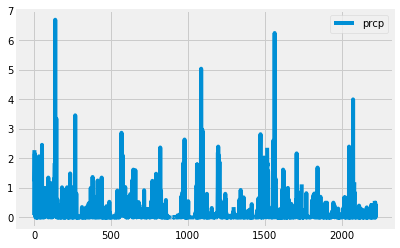

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from today

latest = dt.datetime(2017, 8, 23)
query_date= latest - relativedelta(months=+12)
query_date

# Perform a query to retrieve the data and precipitation scores

session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > query_date ).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df = pd.DataFrame(session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > query_date ).order_by(Measurement.date).all())

# Sort the dataframe by date

prcp_df.sort_values(by='date', ascending=True)


# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot()
plt.legend(loc=0)


# Rotate the xticks for the dates


In [19]:
prcp_df.sort_values(by='date', ascending=True).head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [21]:
# How many stations are available in this dataset?
Station_df['station'].count()

9

In [22]:
# station_count.iloc[0][0]
# station_count['station'] 

In [23]:
# What are the most active stations?
# List the stations and the counts in descending order.
# Convert to DataFrame


join_df = Station_df.merge(Measurement_df,how='left', on='station')

station_count_df = join_df.groupby(["station"])   

station_count =station_count_df.count().reset_index()

station_count=station_count.sort_values("id_x",ascending= False)

active_stations = station_count[['station','id_x']]

active_stations

active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
active_stations
most_active=active_stations[0][0]
most_active


'USC00519281'

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

# take the first station id filter the measurements for the lowest, highest, and average temp


most_active_temp = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active).order_by(Measurement.date).all()


temp_summary=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs))[0]

print(temp_summary)
        

(53.0, 87.0, 73.09795396419437)


In [26]:
active_analysis=join_df.loc[join_df['station'] ==most_active ]



In [27]:
most_active_temp

[('USC00519281', '2010-01-01', 70.0),
 ('USC00519281', '2010-01-02', 62.0),
 ('USC00519281', '2010-01-03', 74.0),
 ('USC00519281', '2010-01-04', 75.0),
 ('USC00519281', '2010-01-05', 74.0),
 ('USC00519281', '2010-01-06', 76.0),
 ('USC00519281', '2010-01-07', 69.0),
 ('USC00519281', '2010-01-08', 66.0),
 ('USC00519281', '2010-01-09', 70.0),
 ('USC00519281', '2010-01-10', 75.0),
 ('USC00519281', '2010-01-11', 64.0),
 ('USC00519281', '2010-01-12', 60.0),
 ('USC00519281', '2010-01-13', 61.0),
 ('USC00519281', '2010-01-14', 68.0),
 ('USC00519281', '2010-01-15', 64.0),
 ('USC00519281', '2010-01-16', 66.0),
 ('USC00519281', '2010-01-17', 67.0),
 ('USC00519281', '2010-01-18', 70.0),
 ('USC00519281', '2010-01-19', 67.0),
 ('USC00519281', '2010-01-20', 67.0),
 ('USC00519281', '2010-01-21', 69.0),
 ('USC00519281', '2010-01-22', 60.0),
 ('USC00519281', '2010-01-23', 75.0),
 ('USC00519281', '2010-01-24', 75.0),
 ('USC00519281', '2010-01-25', 65.0),
 ('USC00519281', '2010-01-26', 75.0),
 ('USC005192

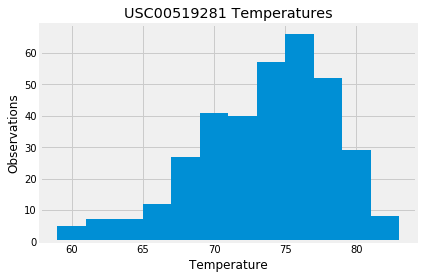

In [39]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


#group temps by range and plot counts

last_year= session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active).\
    filter(Measurement.date > query_date ).order_by(Measurement.date).all()

last_year_df=pd.DataFrame(last_year)

plt.hist(last_year_df['tobs'],12)
plt.xlabel("Temperature")
plt.ylabel("Observations")
plt.title( most_active + " Temperatures")
plt.show()

In [42]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

# start_date =dt.datetime(2017, 8, 23)

# end_date = dt.datetime(2017, 8, 15)
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [48]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date = dt.datetime(2017, 8, 23)

end_date = dt.datetime(2017, 8, 15)

trip = calc_temps('2017-07-23','2017-08-23')


([], <a list of 0 Text xticklabel objects>)

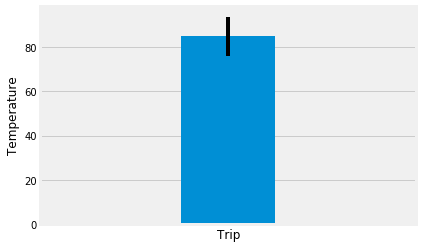

In [74]:


min_temp = trip[0][0]
max_temp = trip[0][1]
avgtemp = trip[0][2]

plt.bar(1,avgtemp,width = .5,align ='center',yerr = max_temp-min_temp)


plt.title('Trip Avg Temp')
plt.xlabel("Trip")
plt.ylabel("Temperature")

plt.xlim(0, 2)
plt.xticks([])


In [33]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [34]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [35]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [36]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [37]:
# Plot the daily normals as an area plot with `stacked=False`
